<a href="https://colab.research.google.com/github/DuyDucNguyen/Practical_FEM_FEniCS_Colab/blob/master/manual_mesh_refinement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manual mesh refinement

In [0]:
# This program shows how to refine a mesh manualy by refine the total mesh or a part of it by using MeshFunction

# Reference: This program is followed the ideas in last chapter of the course 'edx.org - KTHx - High Performance Finite Element Modeling'. 
# The author modifies it up to date and give clear explaination.  

# Copyright (C) 2019 Duy Duc NGUYEN (duyduc.nguyen@protonmail.com)

# This file is part of DOLFIN.

# DOLFIN is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# DOLFIN is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.

# You should have received a copy of the GNU Lesser General Public License
# along with DOLFIN. If not, see <http://www.gnu.org/licenses/>.

# First added:  2019-09-23
# Last changed: 2019-09-23

# This demo is maintained by Duy Duc NGUYEN
# Please report possible problems to duyduc.nguyen@protonmail.com

In [0]:
# install Fenics: 2 mins
from google.colab import files

import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion

if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
    print("Python3 is needed!");
    print("How to fix: Runtime/Change_runtime_type/Python 3");
    sys.exit()
    
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

!rm -rf * # clean up all files
# Useful commands
# Remove an empty folder      : os.rmdir("my_results")
# Remove a folder with files  : shutil.rmtree("results")
# Make a folder               : os.mkdir("my_results")
# Runtime/Change_runtime_type/Python3

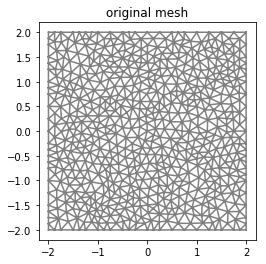

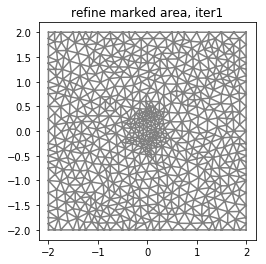

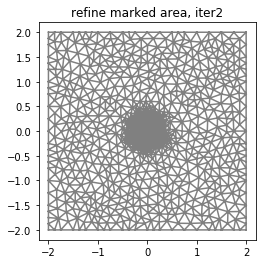

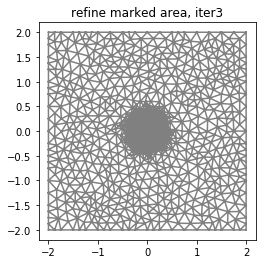

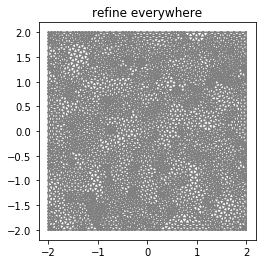

In [4]:
from mshr import *
import time
import matplotlib.pyplot as plt


# Generate mesh
XMIN, XMAX = -2, 2; 
YMIN, YMAX = -2, 2; 
G = [XMIN, XMAX, YMIN, YMAX];
mresolution = 20;
mesh0 = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])), mresolution)




def local_refine(mesh, center, r):
  xc, yc = center
  cell_markers = MeshFunction("bool", mesh, mesh.topology().dim())
  for c in cells(mesh):
    mp = c.midpoint()
    cell_markers[c] = sqrt( (mp[0] - xc)*(mp[0] - xc) + (mp[1] - yc)*(mp[1] - yc)) < r 
  mesh = refine(mesh, cell_markers)  
  return mesh




r = 0.4; xc, yc = 0.0, 0.0;

mesh1 = local_refine(mesh0, [xc, yc], r)
mesh2 = local_refine(mesh1, [xc, yc], r)
mesh3 = local_refine(mesh2, [xc, yc], r)



meshe = refine(mesh0)


	


plt.figure()
plot(mesh0)
plt.title('original mesh')


plt.figure()
plot(mesh1)
plt.title('refine marked area, iter1')


plt.figure()
plot(mesh2)
plt.title('refine marked area, iter2')


plt.figure()
plot(mesh3)
plt.title('refine marked area, iter3')


plt.figure()
plot(meshe)
plt.title('refine everywhere')
plt.show()
